# Task 3: Housing Price Prediction (Regression)

## Objective
To predict house prices based on features like Area, Bedrooms, and Location Score using Random Forest Regressor.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("Libraries Imported.")

Matplotlib is building the font cache; this may take a moment.


Libraries Imported.


### Step 1: Data Generation
Generating a dataset where price correlates with Area and Bedrooms, with some added noise.

In [2]:
np.random.seed(42)
n_houses = 1000

data = {
    'Bedrooms': np.random.randint(1, 6, n_houses),
    'Bathrooms': np.random.randint(1, 4, n_houses),
    'Area_SqFt': np.random.randint(500, 5000, n_houses),
    'YearBuilt': np.random.randint(1990, 2024, n_houses),
    'Location_Score': np.random.uniform(1, 10, n_houses),
    'Price': []
}

# Pricing Logic
for i in range(n_houses):
    price = (data['Area_SqFt'][i] * 150) + \
            (data['Bedrooms'][i] * 10000) + \
            (data['Location_Score'][i] * 5000)
    data['Price'].append(price + np.random.randint(-10000, 10000))

df = pd.DataFrame(data)
print("Housing Data Ready.")
print(df.head())

Housing Data Ready.
   Bedrooms  Bathrooms  Area_SqFt  YearBuilt  Location_Score          Price
0         4          1       4219       2019        6.887195  702825.973166
1         5          1        802       2023        9.002151  221598.756577
2         3          3       4452       2021        6.209261  734812.303953
3         5          2       1486       1992        6.691522  312239.609595
4         5          1       2363       1992        2.408290  411166.452220


### Step 2: Model Training
Training a `RandomForestRegressor` on the training set.

In [3]:
X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Model...")
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Done!")

Training Model...
Done!


### Step 3: Performance Metrics & Visualization
Evaluating using MAE/RMSE and plotting Predicted vs Actual prices.

Mean Absolute Error: $7919.85
Root Mean Squared Error: $9721.51


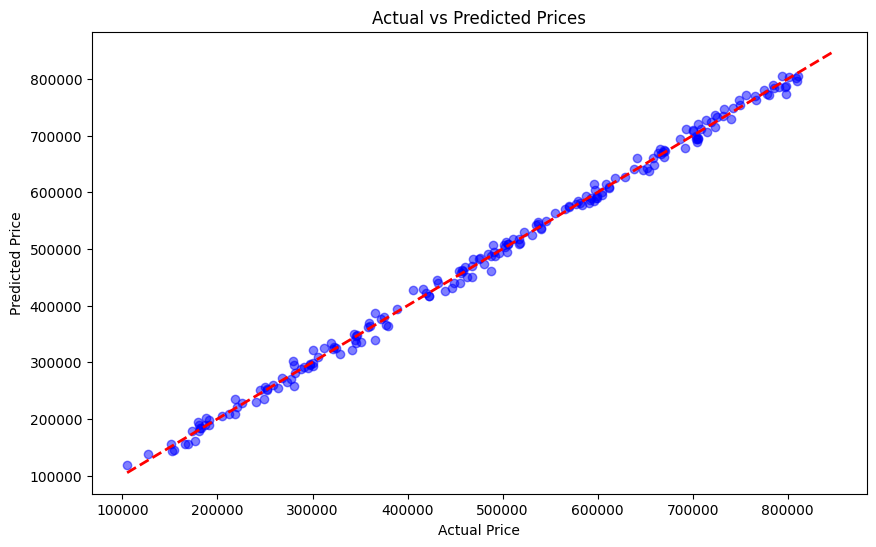

In [4]:
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"Mean Absolute Error: ${mae:.2f}")
print(f"Root Mean Squared Error: ${rmse:.2f}")

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()